<a href="https://colab.research.google.com/github/m-edal/Earth-Env-DS-MSc-Course/blob/main/labs/W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code for Assessment of EART60702 Project 1 (Group 2)**

- Earth and Environmental Data Science (EART60702)
- Presented on: 24 February, 2026

**Group members:**
- 1. Xinqi Xie
- 2. Qianhao Li
- 3. Xinhao Zhou
- 4. Emmanuel Julius

Project title;

**Under Regional Warming and Rising Atmospheric Moisture: How Extra Moisture Translates into Extreme Precipitation Events (2006–2080)**

Research question;

**Under regional warming with rising atmospheric moisture, how does this translate into extreme precipitation changes?**

Specific objectives;

**i.	To investigate long-term trends in temperature, specific humidity, and precipitation**

**ii.	To evaluate the linear correlations between parameters**

**iii.	To quantify changes in the extreme rainfall frequency and intensity events and assess their implications.**


## 1. Importing packages and datasets
**NumPy, Pandas, and Project_1 datasets:**


In [32]:
# 1.1 Importing numpy and pandas package
import numpy as np
import pandas as pd

In [33]:
# 1.2 Checking packages' versions
print(np.__version__)
print(pd.__version__)

2.0.2
2.2.2


In [34]:
# 1.3 Importing datasets as xarray from the csv file, read by pandas and display first 5 rows of the dataframe.
import xarray as xr

In [35]:
#Kindly import the data from your local disk. Select a CSV file named "project_1.csv"
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving project_1.csv to project_1 (1).csv


In [37]:
#After selecting a CSV file, Proceed to import
import io

# Find the actual filename for 'project_1.csv' in the uploaded dictionary
project_1_filename = None
for key in uploaded.keys():
    if key == 'project_1.csv': # Changed to exact match for 'project_1.csv'
        project_1_filename = key
        break

if project_1_filename:
    # Get the content of the identified 'project_1.csv' from the uploaded dictionary
    csv_data = uploaded[project_1_filename].decode('utf-8')

    # Read the CSV data into a pandas DataFrame
    df_project1 = pd.read_csv(io.StringIO(csv_data))

    print(f"Successfully loaded '{project_1_filename}' into df_project1.")
    # Display the first 5 rows of the DataFrame
    display(df_project1.head())

#2. Pre-processing of the datasets
**Dropping the unnamed columns, setting time at an appropriate datetime index and renaming parameters for clarity**

In [38]:
# 2.1 Identify and drop columns that contain 'Unnamed' in their name
unnamed_cols = [col for col in df_project1.columns if 'Unnamed' in col]

# Drop these columns from the DataFrame
df_project1 = df_project1.drop(columns=unnamed_cols)

# Display the first few rows to confirm the changes
display(df_project1.head())

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,02/01/2006 00:00,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,03/01/2006 00:00,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,04/01/2006 00:00,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,05/01/2006 00:00,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,06/01/2006 00:00,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [40]:
# Formatting dates into ISO 8601 datetime;
df_project2 = df_project1.copy()
df_project2['time'] = pd.to_datetime(df_project2['time'], format='%d/%m/%Y %H:%M')
display(df_project2.head())

,time,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon
0,2006-01-02,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


In [41]:
#2.3 Renaming parameters for clarity and providing datasets summary
df_project3 = df_project2.rename(columns={'time': 'Time', 'TREFMXAV_U': 'Max Temp', 'FLNS': 'Longwave Rad', 'FSNS': 'Shortwave Rad', 'PRECT': 'Precipitation Rate', 'PRSN': 'Snowfall', 'QBOT': 'Specific Humidity', 'TREFHT': 'Air Temp', 'UBOT': 'E-W Wind Speed', 'VBOT': 'N-S Wind Speed','lat': 'Lat', 'lon': 'Lon'})

display(df_project3.head())

#Summary;
num_rows, num_cols = df_project3.shape
print(f"Total number of rows: {num_rows}")
print(f"Total number of columns: {num_cols}")

,Time,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed,Lat,Lon
0,2006-01-02,282.77585,41.925180,25.926952,4.660000e-09,4.780000e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5
1,2006-01-03,284.47113,8.905806,10.946910,8.050000e-08,1.300000e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5
2,2006-01-04,284.28796,16.511415,6.405902,2.910000e-09,4.090000e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5
3,2006-01-05,282.12110,29.948362,9.315041,7.430000e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5
4,2006-01-06,280.89090,19.064156,7.941241,6.890000e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5


Total number of rows: 27374
Total number of columns: 12


#3. Exploratory Data Analysis (EDA)

In [42]:
#3.1 Checking for missing values
missing_data = df_project3.isnull().sum()
print(missing_data)

Time                  0
Max Temp              0
Longwave Rad          0
Shortwave Rad         0
Precipitation Rate    0
Snowfall              0
Specific Humidity     0
Air Temp              0
E-W Wind Speed        0
N-S Wind Speed        0
Lat                   0
Lon                   0
dtype: int64


**Comment:** There is no any missing value.

In [43]:
#3.2 Checking for duplicate values
duplicate_rows = df_project1[df_project3.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [time, TREFMXAV_U, FLNS, FSNS, PRECT, PRSN, QBOT, TREFHT, UBOT, VBOT, lat, lon]
Index: []


**Comment:** There are no duplicates.

In [44]:
#3.3 Showing key statistics
display(df_project3.drop(columns=['Time', 'Lat', 'Lon']).describe())

,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000
mean,288.836179,42.995679,97.026261,3.379656e-08,3.049255e-10,0.006523,284.876413,1.176320,1.503084
std,5.246468,21.451927,75.062880,4.986414e-08,4.704584e-09,0.002126,4.992277,3.066843,2.940138
min,274.153200,0.611385,2.819259,-4.670000e-28,-6.260000e-21,0.001855,268.938400,-9.739025,-8.991429
25%,284.719465,26.157544,31.037187,2.130000e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405
50%,288.299895,40.777005,78.443183,1.310000e-08,1.210000e-21,0.006211,284.537575,1.488009,1.593354
75%,292.869525,57.113572,149.332133,4.637500e-08,2.350000e-16,0.007947,288.900110,3.390555,3.634500
max,311.257260,111.851400,310.191700,7.750000e-07,2.330000e-07,0.015222,303.117980,10.234506,11.178102


**Observations:**

There are two unusual observations: Minimum values for Precipitation rate and Snowfall are **NEGATIVE**. These are scalar quantities, and they can't be negative. In the case of wind speed, it is possible and common to have a negative value.

**Correction:**
Those values are inspected and, once found to be very small negative numbers, are corrected by setting their values to zero:

In [45]:
#Setting negative precipitation and snowfall values to zero.
df_project4 = df_project3.copy() # Initialize df_project4 as a copy of df_project3
df_project4.loc[df_project4['Precipitation Rate'] < 0, 'Precipitation Rate'] = 0
print("Negative 'Precipitation Rate' values have been set to 0.")
df_project4.loc[df_project4['Snowfall'] < 0, 'Snowfall'] = 0
print("Negative 'Snowfall' values have been set to 0.")

# Let's verify by checking the summary statistics again
display(df_project4.drop(columns=['Time', 'Lat', 'Lon']).describe())

Negative 'Precipitation Rate' values have been set to 0.
Negative 'Snowfall' values have been set to 0.


,Max Temp,Longwave Rad,Shortwave Rad,Precipitation Rate,Snowfall,Specific Humidity,Air Temp,E-W Wind Speed,N-S Wind Speed
count,27374.000000,27374.000000,27374.000000,2.737400e+04,2.737400e+04,27374.000000,27374.000000,27374.000000,27374.000000
mean,288.836179,42.995679,97.026261,3.379656e-08,3.049255e-10,0.006523,284.876413,1.176320,1.503084
std,5.246468,21.451927,75.062880,4.986414e-08,4.704584e-09,0.002126,4.992277,3.066843,2.940138
min,274.153200,0.611385,2.819259,0.000000e+00,0.000000e+00,0.001855,268.938400,-9.739025,-8.991429
25%,284.719465,26.157544,31.037187,2.130000e-09,0.000000e+00,0.004860,280.987885,-1.085982,-0.766405
50%,288.299895,40.777005,78.443183,1.310000e-08,1.210000e-21,0.006211,284.537575,1.488009,1.593354
75%,292.869525,57.113572,149.332133,4.637500e-08,2.350000e-16,0.007947,288.900110,3.390555,3.634500
max,311.257260,111.851400,310.191700,7.750000e-07,2.330000e-07,0.015222,303.117980,10.234506,11.178102


## Selecting three parameters (Air Temperature, Precipitation Rate and Specific Humidity) and dropping all others.

In [46]:
#Selecting Time, Air Temperature Humidity and Precipitation Rate (as paremeters of our interest)
df_project5 = df_project4[['Time', 'Air Temp', 'Precipitation Rate', 'Specific Humidity']]
#Renaming parameters (Abbreviation and Units)
df_project5 = df_project5.rename(columns={'Air Temp': 'Temp (K)', 'Precipitation Rate': 'Precip (m/s)', 'Specific Humidity':'Humid (Kg/Kg)'})
#Display
display(df_project5.head())


,Time,Temp (K),Precip (m/s),Humid (Kg/Kg)
0,2006-01-02,279.14288,4.660000e-09,0.004769
1,2006-01-03,281.14865,8.050000e-08,0.006271
2,2006-01-04,281.22380,2.910000e-09,0.005782
3,2006-01-05,278.39767,7.430000e-11,0.004277
4,2006-01-06,278.06378,6.890000e-12,0.003990


In [47]:
#3.3 Showing key statistics
display(df_project5.drop(columns=['Time']).describe())

,Temp (K),Precip (m/s),Humid (Kg/Kg)
count,27374.000000,2.737400e+04,27374.000000
mean,284.876413,3.379656e-08,0.006523
std,4.992277,4.986414e-08,0.002126
min,268.938400,0.000000e+00,0.001855
25%,280.987885,2.130000e-09,0.004860
50%,284.537575,1.310000e-08,0.006211
75%,288.900110,4.637500e-08,0.007947
max,303.117980,7.750000e-07,0.015222


## 4. Analyses
**Both Matplotlib and Seaborn has been used for visualization**

In [48]:
#Inserting tools for analyses and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Versions of matplotib and seaborn
print(matplotlib.__version__)
print(sns.__version__)


3.10.0
0.13.2


###4.1 Temperature, precipitation and humidity over time (Trends).
- Annual mean values have been used

**Temperature**

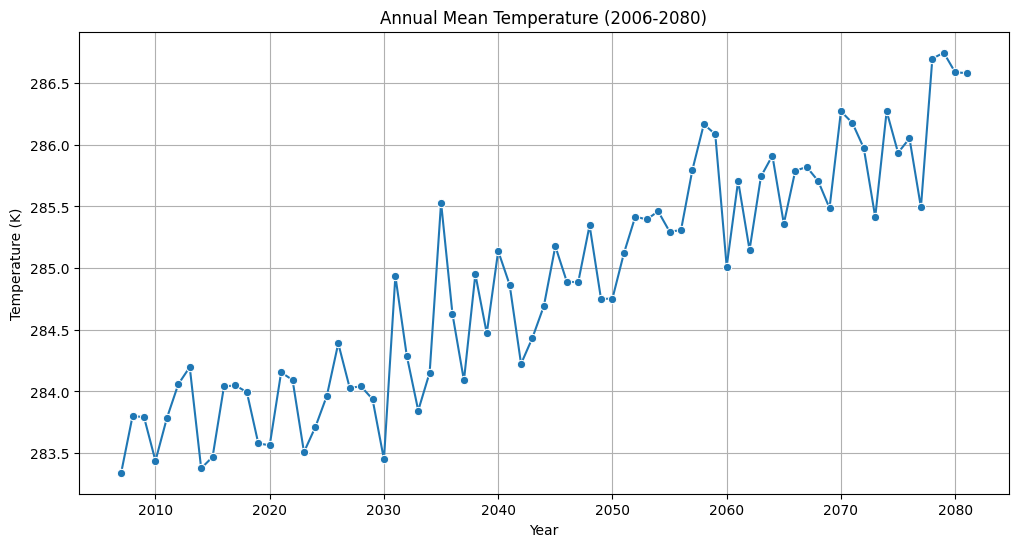

In [49]:
#Trend for annual mean temperature.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean temperature
annual_mean_temp = df_project5_indexed['Temp (K)'].resample('YE').mean().reset_index()

# Plotting the annual mean temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Temp (K)', data=annual_mean_temp, marker='o')
plt.title('Annual Mean Temperature (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.show()

**Observation:**
- Key trend: Significant and consistent warming path throughout the 21st century.
- Average temperatures rise from approximately 283.5K to over 286.5K.
- Implication: Provides the thermal energy required to increase atmospheric water-holding capacity.

**Humidity**

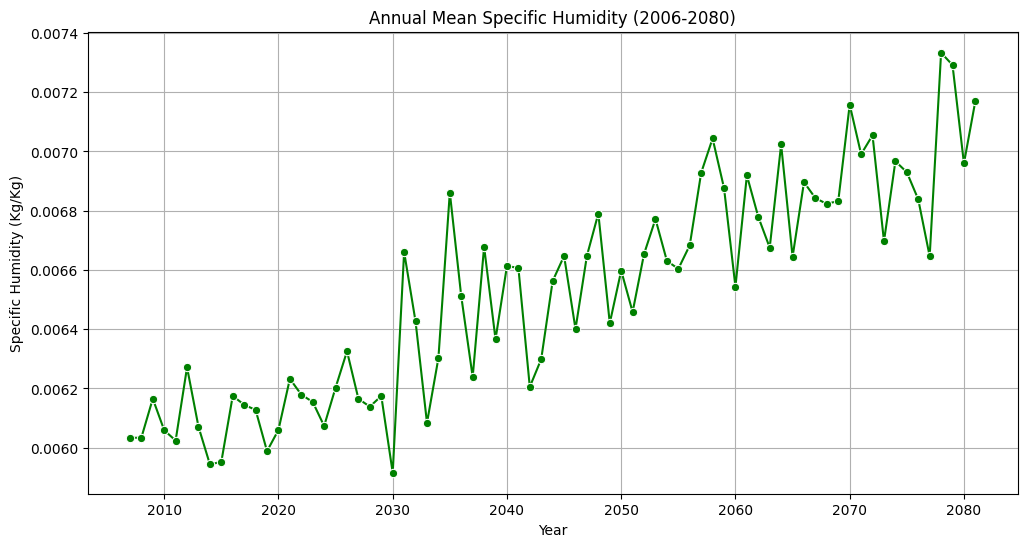

In [50]:
#Trend for annual mean specific humidity.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean specific humidity
annual_mean_humid = df_project5_indexed['Humid (Kg/Kg)'].resample('YE').mean().reset_index()

# Plotting the annual mean temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Humid (Kg/Kg)', data=annual_mean_humid, marker='o', color='green')
plt.title('Annual Mean Specific Humidity (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Specific Humidity (Kg/Kg)')
plt.grid(True)
plt.show()

**Observation:**
- Key trend: Clear upward trend in atmospheric moisture levels, closely following the temperature rise (Willett et al., 2020).
- Data Point: Specific humidity increases from ~0.0060 Kg/Kg to over 0.0072 Kg/Kg.

**Precipitation**

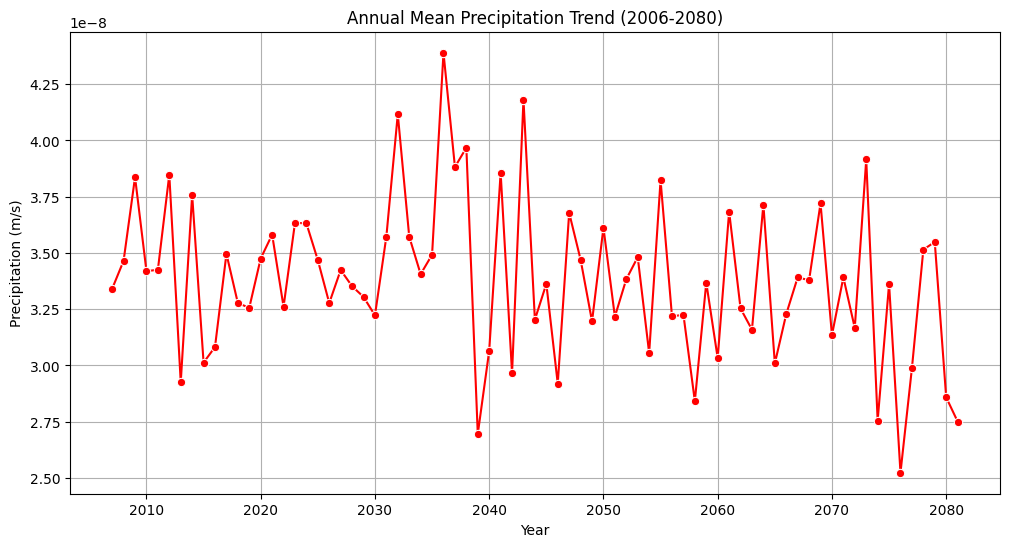

In [51]:
#Trend for annual mean precipitation.

# Set 'Time' as the index for resampling
df_project5_indexed = df_project5.set_index('Time')

# Resample to annual frequency and calculate the mean precipitation
annual_mean_precip = df_project5_indexed['Precip (m/s)'].resample('YE').mean().reset_index()

# Plotting the annual mean precipitation trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Precip (m/s)', data=annual_mean_precip, marker='o', color='red')
plt.title('Annual Mean Precipitation Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Precipitation (m/s)')
plt.grid(True)
plt.show()

**Observation:**
- Key trend: No clear linear long-term increase in mean annual precipitation
- Highly Unpredictable: Significant changes from one year to the next (frequent ups and downs).
- Insight: Regional warming does not lead to a matching increase in average rainfall.

### 4.2 Correlation between parameters

4.2.1 Temperature vs Humidity

In [52]:
# Merge annual mean temperature and specific humidity dataframes
annual_temp_humid = pd.merge(annual_mean_temp, annual_mean_humid, on='Time')

# Calculate correlation between Annual Mean Temperature and Annual Mean Specific Humidity
correlation_annual_temp_humid = annual_temp_humid['Temp (K)'].corr(annual_temp_humid['Humid (Kg/Kg)'])
print(f"Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: {correlation_annual_temp_humid}")

Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: 0.9722094955948025


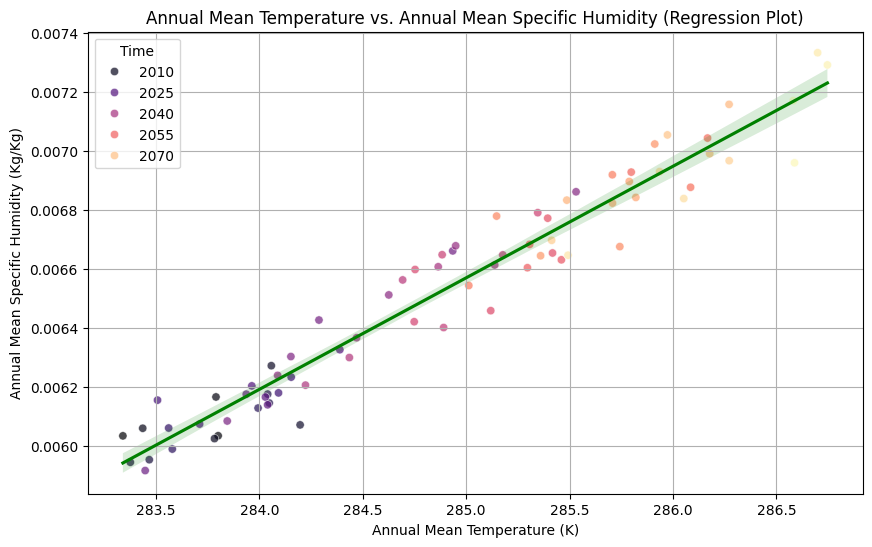

In [53]:
# Plotting Annual Mean Temperature vs. Annual Mean Specific Humidity with a regression line
plt.figure(figsize=(10, 6))

# Use scatterplot to get points colored by year and generate a legend
sns.scatterplot(
    x='Temp (K)',
    y='Humid (Kg/Kg)',
    data=annual_temp_humid,
    alpha=0.7,
    hue=annual_temp_humid['Time'].dt.year, # Color points by year
    palette='magma' # Use a color palette
)

# Overlay the regression line
sns.regplot(
    x='Temp (K)',
    y='Humid (Kg/Kg)',
    data=annual_temp_humid,
    scatter=False, # Do not draw scatter points again
    color='green', # Color for the regression line
    ax=plt.gca() # Plot on the current axes
)

plt.title('Annual Mean Temperature vs. Annual Mean Specific Humidity (Regression Plot)')
plt.xlabel('Annual Mean Temperature (K)')
plt.ylabel('Annual Mean Specific Humidity (Kg/Kg)')
plt.grid(True)
plt.show()

In [54]:
# Calculate correlation between Annual Mean Temperature and Annual Mean Specific Humidity
correlation_annual_temp_humid = annual_temp_humid['Temp (K)'].corr(annual_temp_humid['Humid (Kg/Kg)'])
print(f"Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: {correlation_annual_temp_humid}")

Correlation between Annual Mean Temperature and Annual Mean Specific Humidity: 0.9722094955948025


In [55]:
#SPEARMAN STATISTICAL TEST
from scipy.stats import spearmanr

# Perform Spearman correlation test
spearman_coefficient, spearman_p_value = spearmanr(df_project5['Temp (K)'], df_project5['Humid (Kg/Kg)'])

print(f"Spearman Correlation Coefficient between Temperature and Specific Humidity: {spearman_coefficient:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if spearman_p_value < alpha:
    print(f"Since the p-value ({spearman_p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant monotonic relationship between Temperature and Specific Humidity.")
else:
    print(f"Since the p-value ({spearman_p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant monotonic relationship between Temperature and Specific Humidity.")

Spearman Correlation Coefficient between Temperature and Specific Humidity: 0.8856
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant monotonic relationship between Temperature and Specific Humidity.


In [56]:
#PEARSON STATISTICAL TEST
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_project5['Temp (K)'], df_project5['Humid (Kg/Kg)'])

print(f"Pearson Correlation Coefficient between Temperature and Specific Humidity : {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between Temperature and Specific Humidity.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between Temperature and Specific Humidity.")

Pearson Correlation Coefficient between Temperature and Specific Humidity : 0.8762
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant linear relationship between Temperature and Specific Humidity.


**Observation:**
- Statistical Result: Strong positive correlation (R=0.97).  
- Scientific Basis: Confirms the physical relationship where warmer air holds more water vapour (Coffel et al. 2018, and Byrne & O’Gorman, 2018).
- Significance: P<0.05 indicates a statistically significant linear relationship.

4.2.2 Temperature vs Precipitation

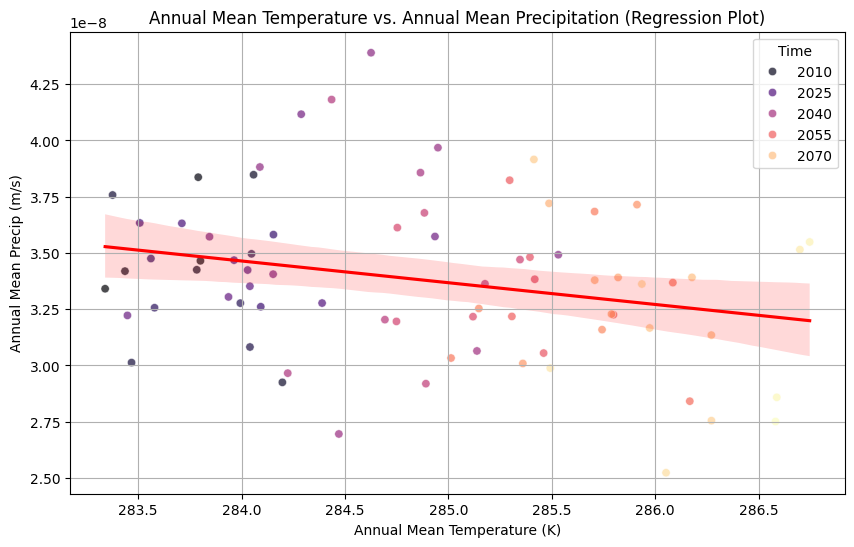

In [57]:
# Plotting Annual Mean Temperature vs. Annual Mean Specific Humidity with a regression line
plt.figure(figsize=(10, 6))

# Use scatterplot to get points colored by year and generate a legend
sns.scatterplot(
    x='Temp (K)',
    y='Precip (m/s)',
    data=annual_temp_precip,
    alpha=0.7,
    hue=annual_temp_precip['Time'].dt.year, # Color points by year
    palette='magma' # Use a color palette
)

# Overlay the regression line
sns.regplot(
    x='Temp (K)',
    y='Precip (m/s)',
    data=annual_temp_precip,
    scatter=False, # Do not draw scatter points again
    color='red', # Color for the regression line
    ax=plt.gca() # Plot on the current axes
)

plt.title('Annual Mean Temperature vs. Annual Mean Precipitation (Regression Plot)')
plt.xlabel('Annual Mean Temperature (K)')
plt.ylabel('Annual Mean Precip (m/s)')
plt.grid(True)
plt.show()

In [58]:
# Calculate correlation between Annual Mean Temperature and Annual Mean Precipitation
correlation_annual_temp_precip = annual_temp_precip['Temp (K)'].corr(annual_temp_precip['Precip (m/s)'])
print(f"Correlation between Annual Mean Temperature and Annual Mean Precipitation: {correlation_annual_temp_precip}")

Correlation between Annual Mean Temperature and Annual Mean Precipitation: -0.25815374895586257


In [59]:
#SPEARMAN STATISTICAL TEST
from scipy.stats import spearmanr

# Perform Spearman correlation test
spearman_coefficient, spearman_p_value = spearmanr(df_project5['Temp (K)'], df_project5['Precip (m/s)'])

print(f"Spearman Correlation Coefficient between Temperature and precipitation: {spearman_coefficient:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if spearman_p_value < alpha:
    print(f"Since the p-value ({spearman_p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant monotonic relationship between Temperature and precipitation.")
else:
    print(f"Since the p-value ({spearman_p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant monotonic relationship between Temperature and precipitation.")

Spearman Correlation Coefficient between Temperature and precipitation: -0.0353
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant monotonic relationship between Temperature and precipitation.


In [60]:
#PEARSON STATISTICAL TEST
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_project5['Temp (K)'], df_project5['Precip (m/s)'])

print(f"Pearson Correlation Coefficient between Temperature and Precipitation : {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between Temperature and precipitation.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between Temperature and precipitation.")

Pearson Correlation Coefficient between Temperature and Precipitation : -0.0270
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant linear relationship between Temperature and precipitation.


**Observation:**
- Statistical Result: Weak/Negative linear correlation (R=−0.258).
- The regression line remains relatively negatively declining despite significant warming.
- Key insight: Rising temperatures alone do not automatically mean more annual mean rainfall.

4.2.3 Precipitation vs Humidity

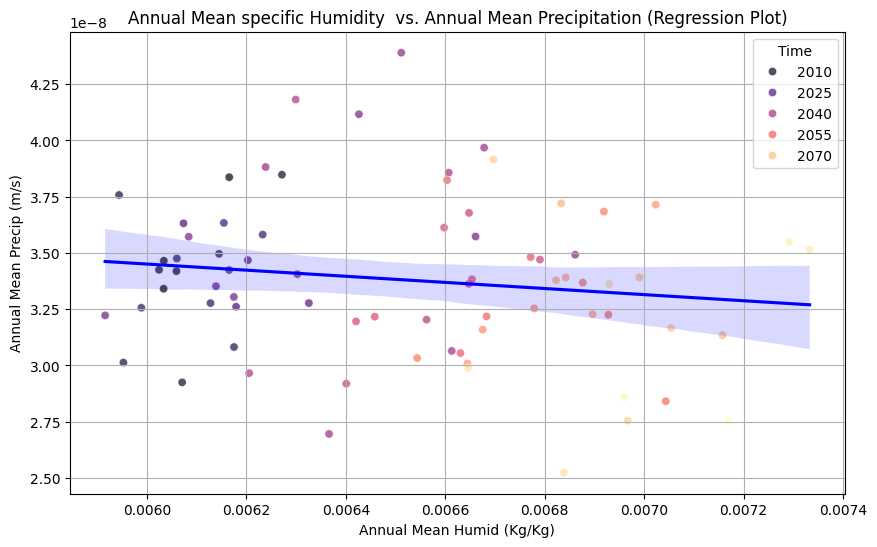

In [61]:
# Merge annual mean precipitation and specific humidity dataframes
annual_precip_humid = pd.merge(annual_mean_precip, annual_mean_humid, on='Time')

# Plotting Annual Mean specific Humidity vs. Annual Mean Precipitation with a regression line
plt.figure(figsize=(10, 6))

# Use scatterplot to get points colored by year and generate a legend
sns.scatterplot(
    x='Humid (Kg/Kg)',
    y='Precip (m/s)',
    data=annual_precip_humid,
    alpha=0.7,
    hue=annual_precip_humid['Time'].dt.year, # Color points by year
    palette='magma' # Use a color palette
)

# Overlay the regression line
sns.regplot(
    x='Humid (Kg/Kg)',
    y='Precip (m/s)',
    data=annual_precip_humid,
    scatter=False, # Do not draw scatter points again
    color='blue', # Color for the regression line
    ax=plt.gca() # Plot on the current axes
)

plt.title('Annual Mean specific Humidity  vs. Annual Mean Precipitation (Regression Plot)')
plt.xlabel('Annual Mean Humid (Kg/Kg)')
plt.ylabel('Annual Mean Precip (m/s)')
plt.grid(True)
plt.show()

In [62]:
# Calculate correlation between Annual Mean Precipitation and Annual Mean Humidity
correlation_annual_precip_humid = annual_precip_humid['Precip (m/s)'].corr(annual_precip_humid['Humid (Kg/Kg)'])
print(f"Correlation between Annual Mean Precipitation and Annual Mean Humidity: {correlation_annual_precip_humid}")

Correlation between Annual Mean Precipitation and Annual Mean Humidity: -0.14129019863687814


In [63]:
#SPEARMAN STATISTICAL TEST
from scipy.stats import spearmanr

# Perform Spearman correlation test
spearman_coefficient, spearman_p_value = spearmanr(df_project5['Precip (m/s)'], df_project5['Humid (Kg/Kg)'])

print(f"Spearman Correlation Coefficient between precipitation and Specific Humidity: {spearman_coefficient:.4f}")
print(f"P-value: {spearman_p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if spearman_p_value < alpha:
    print(f"Since the p-value ({spearman_p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant monotonic relationship between precipitation and Specific Humidity.")
else:
    print(f"Since the p-value ({spearman_p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant monotonic relationship between precipitation and Specific Humidity.")

Spearman Correlation Coefficient between precipitation and Specific Humidity: 0.2394
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant monotonic relationship between precipitation and Specific Humidity.


In [64]:
#PEARSON STATISTICAL TEST
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_project5['Precip (m/s)'], df_project5['Humid (Kg/Kg)'])

print(f"Pearson Correlation Coefficient between Precipitation and Specific Humidity: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant linear relationship between precipitation and Specific Humidity.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant linear relationship between precipitation and Specific Humidity.")

Pearson Correlation Coefficient between Precipitation and Specific Humidity: 0.2136
P-value: 0.0000
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant linear relationship between precipitation and Specific Humidity.


**Observation:**
- Statistical Result: Very weak correlation (R=−0.14).
- Increased water availability in the atmosphere does not result in a steady increase in mean precipitation.
- Key Shift: Suggests that moisture is likely released through extreme bursts rather than steady rain.

### 4.3 Extreme events

Extreme rainfall threshold is defined using the 95th percentile of non-zero daily precipitation values. The 95th percentile-based approach for identifying precipitation extremes is widely used in climate studies (IPCC, 2021).

In [65]:
#Rainfall extremes frequence and intensity
# Define daily_precipitation from df_project5_indexed
daily_precipitation = df_project5_indexed['Precip (m/s)']

# 1. Filter daily_precipitation for non-zero values
non_zero_daily_precipitation = daily_precipitation[daily_precipitation > 0]

# 2. Calculate the 95th percentile of the 'Precip (m/s)' column from non_zero_daily_precipitation
EXTREME_RAINFALL_THRESHOLD = non_zero_daily_precipitation.quantile(0.95)
print(f"Extreme rainfall threshold (95th percentile): {EXTREME_RAINFALL_THRESHOLD} m/s")

# 3. Identify the extreme rainfall days
extreme_rainy_days = daily_precipitation > EXTREME_RAINFALL_THRESHOLD
print(f"Number of extreme rainy days identified: {extreme_rainy_days.sum()}")

# 4. Calculate the annual frequency of extreme rainfall events
annual_extreme_rainfall_frequency = extreme_rainy_days.resample('YE').sum().to_frame(name='Extreme Rainfall Frequency (days/year)')
print("Annual extreme rainfall frequency calculated successfully.")
display(annual_extreme_rainfall_frequency.head())

# 5. Calculate the annual average intensity of extreme rainfall events
extreme_rainy_day_precipitation = daily_precipitation[extreme_rainy_days]
annual_extreme_rainfall_intensity = extreme_rainy_day_precipitation.resample('YE').mean().to_frame(name='Extreme Rainfall Intensity (m/s)')
print("Annual extreme rainfall intensity calculated successfully.")
display(annual_extreme_rainfall_intensity.head())

Extreme rainfall threshold (95th percentile): 1.33e-07 m/s
Number of extreme rainy days identified: 1351
Annual extreme rainfall frequency calculated successfully.


,Extreme Rainfall Frequency (days/year)
Time,
2006-12-31,17
2007-12-31,15
2008-12-31,19
2009-12-31,14
2010-12-31,18


Annual extreme rainfall intensity calculated successfully.


,Extreme Rainfall Intensity (m/s)
Time,
2006-12-31,1.884118e-07
2007-12-31,1.863333e-07
2008-12-31,2.224211e-07
2009-12-31,2.077857e-07
2010-12-31,1.930000e-07


Extreme frequency over time

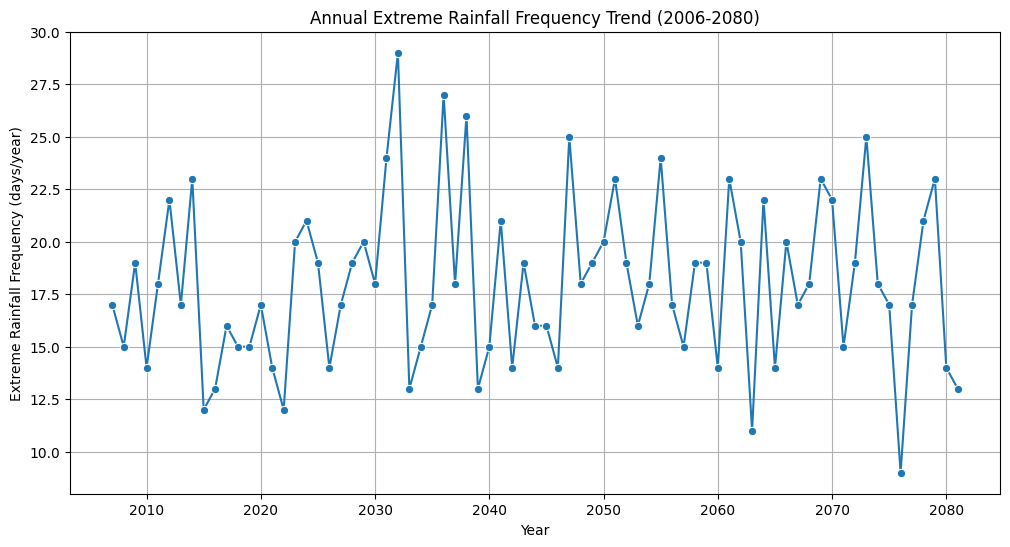

In [66]:
# 1. Plotting Annual Extreme Rainfall Frequency Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Extreme Rainfall Frequency (days/year)', data=annual_extreme_rainfall_frequency.reset_index(), marker='o')
plt.title('Annual Extreme Rainfall Frequency Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Extreme Rainfall Frequency (days/year)')
plt.grid(True)
plt.show()

**Observation:**
There is no distinct linear upward or downward trend apparent. There is high interannual variability, with the number of extreme precipitation days fluctuating sharply throughout the forecast period. A critical high-risk period is identified in the early to mid-2030s, showing a significantly higher frequency of extreme events compared to the historical average.

Extreme intensity over time

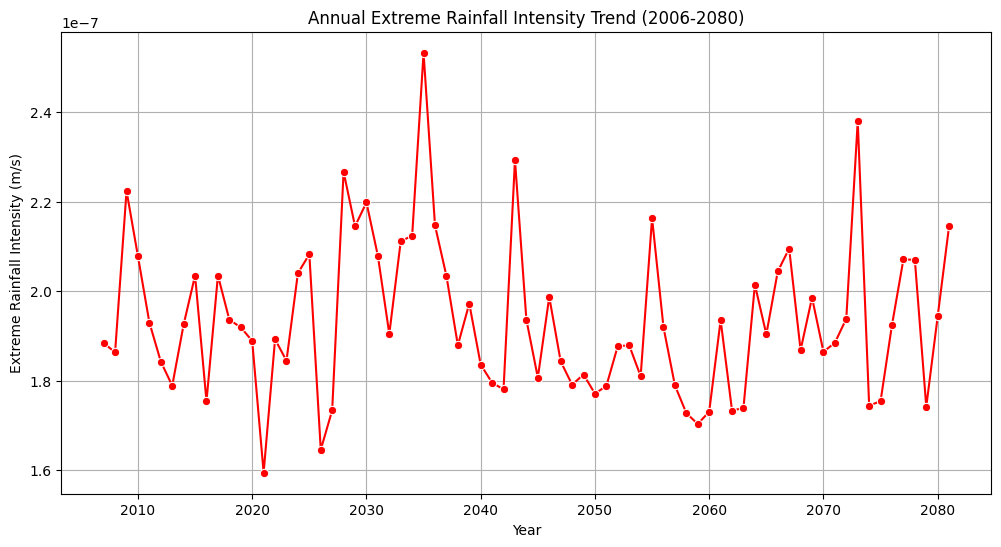

In [67]:
# 2. Plotting Annual Extreme Rainfall Intensity Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Extreme Rainfall Intensity (m/s)', data=annual_extreme_rainfall_intensity.reset_index(), marker='o', color='red')
plt.title('Annual Extreme Rainfall Intensity Trend (2006-2080)')
plt.xlabel('Year')
plt.ylabel('Extreme Rainfall Intensity (m/s)')
plt.grid(True)
plt.show()

**Observation:**
There is no consistent increase or decrease in intensity over the years. A significant outbreak of extreme intensity is expected in the mid-2030s, marked by a peak in precipitation intensity that greatly surpasses historical and projected averages. This could increase the risk of flash floods (Tabari, 2020)

##Conclusion
The study demonstrates that regional warming leads to a clear increase in atmospheric moisture. However, increased moisture does not produce a proportional increase in mean annual precipitation. Instead, rainfall appears to become more variable and more intense during extreme events. The peak in intensity poses a severe risk of flash flooding.
##Limitations
- Both the frequency and intensity of extreme precipitation exhibit sharp fluctuations, making it difficult to establish a clear long-term linear projection trend.
- The conclusions are highly dependent on specific projection scenarios for the 2006–2080 period and may not encompass all potential climate change pathways.

##Recommendations
According to the IPCC (2022), adaptation strategies to reduce flash flood risk should prioritise

- **Flood-resilient infrastructure**
Develop 'Sponge City' infrastructure by implementing permeable pavements, green roofs, and constructed wetlands to capture rainwater and mitigate surface runoff pressure.
Improve engineering design standards for all public infrastructure to withstand higher "Extreme Rainfall Intensity" baselines.
- **Improved drainage systems**
Upgrade and expand ageing urban drainage networks while introducing real-time monitoring systems to pre-emptively drain scenic lakes or detention basins based on precipitation forecasts, thereby increasing storage capacity
- **Early warning mechanisms**
i.Smart Monitoring Network：Integrate radar, rain gauges, and sensors for real-time tracking of precipitation and water levels.
ii.Multi-channel Alerts：Deploy apps and broadcasts for targeted warnings, supported by public education campaigns.

##Reference list

1.	Byrne, M.P. and O’Gorman, P.A. (2018) ‘Trends in terrestrial relative humidity identified from station observations and regional climate models’, Proceedings of the National Academy of Sciences, 115(19), pp. 4875–4880. Available at: https://doi.org/10.1073/pnas.1720682115

2.	Coffel, E.D., Horton, R.M. and de Sherbinin, A. (2018) ‘Temperature and humidity-based projections of a rapid rise in global heat stress exposure during the 21st century’, Environmental Research Letters, 13(1), 014001. Available at: https://doi.org/10.1088/1748-9326/aaa00e

3.	Intergovernmental Panel on Climate Change (IPCC) (2021) Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change. Cambridge: Cambridge University Press. Available at: https://doi.org/10.1017/9781009157896

4.	Intergovernmental Panel on Climate Change (IPCC) (2022) Climate Change 2022: Impacts, Adaptation and Vulnerability. Contribution of Working Group II to the Sixth Assessment Report. Cambridge: Cambridge University Press. Available  https://doi.org/10.1017/9781009325844

5.	Tabari, H. (2020) ‘Climate change impact on flood and extreme precipitation increases with water availability’, Scientific Reports, 10, 13768. Available at: https://doi.org/10.1038/s41598-020-70816-2

6.	Willett, K.M., Dunn, R.J.H., Thorne, P.W., Bell, S., de Podesta, M., Parker, D.E., Jones, P.D. and Williams, C.N. (2020) ‘Development of the HadISDH.land humidity dataset: Global surface humidity and temperature since 1973, Earth System Science Data, 12(4), pp. 2853–2863. Available at: https://doi.org/10.5194/essd-12-2853-2020
